<a href="https://colab.research.google.com/github/michalis0/DataScience_and_MachineLearning/blob/master/05-neural-networks/Week_5_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/michalis0/DataScience_and_MachineLearning/blob/master/05-neural-networks/Week_5_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from IPython.display import YouTubeVideo

# ML import
from sklearn.model_selection import train_test_split # Splitting the data set
from sklearn.preprocessing import MinMaxScaler       # Normalization
from sklearn.preprocessing import LabelEncoder       # Encoder
import torch                                   # PyTorch
import torch.nn as nn                          # PyTorch building blocks
from IPython.display import YouTubeVideo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Neural Nets

<img src='https://imgs.xkcd.com/comics/trained_a_neural_net.png' width="270">

Source: [xqcd 2173](https://xkcd.com/2173/)

## Content

The goal of this walkthrough is to provide you with insights on Neural Nets. After presenting the main concepts, you will be introduced to the techniques to implement your own neural network in Python, with PyTorch and using a pre-build Neural Net.

This notebook is organized as follows:
- [Background](#Background)
    - [Neurons](#Neurons)
        - [Biological Neuron](#Biological-Neuron)
        - [Artificial neuron and perceptron](#Artificial-neuron-and-perceptron)
            - [Activation function](#Activation-function)
    - [Some Neural Nets](#Some-Neural-Nets)
        - [Multilayer Perceptron (MLP)](#Multilayer-Perceptron-(MLP))
        - [Convolutional Neural Nerwork (CNN)](#Convolutional-Neural-Nerwork-(CNN))
        - [Recurrent Neural Network (RNN)](#Recurrent-Neural-Network-(RNN))
- [How to build your own Neural Net?](#How-to-build-your-own-Neural-Net?)
    - [Application: Predicting house prices](#Application:-Predicting-house-prices)
        - [Data](#Data)
            - [Preprocessing](#Preprocessing)
            - [Creating training and test set](#Creating-training-and-test-set)
            - [Normalizing-the-data](#Normalizing-the-data)
        - [Building a Linear Regression model with PyTorch](#Building-a-Linear-Regression-model-with-PyTorch)
            - [Create tensors](#Create-tensors)
            - [Define and train a model with PyTorch](#Define-and-train-a-model-with-PyTorch)
        - [Your turn](#Your-turn)
- [Implement a pre-built Neural Net](#Implement-a-pre-built-Neural-Net)

# 1. Background

[Artificial Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network) - simply called Neural Nets (NNs) - are computing systems inspired by the biological neural networks that constitute animal brains. They are used to approximate functions that are generally unknown.

NNs are based on a collection of connected nodes, called **artificial neurons**. In short, an [artificial neuron](https://en.wikipedia.org/wiki/Artificial_neuron) is a mathematical function conceived as a model of biological neurons.

These artificial neurons are aggregated into **layers**. Signals travel from the first layer (the *input layer*), to the last layer (the *output layer*), traversing one or several *hidden layers*, which perform different transformations on their inputs. The output of one layer is the input of the next one: this is called **forward propagation**. A neural network with multiple layers between the input and output layers is called [Deep Neural Network](https://en.wikipedia.org/wiki/Deep_learning#Deep_neural_networks) (DNN).

Below is an illustration of a simple NN. Each circle represents an artificial neuron and an arrow represents a connection from the output of one artificial neuron to the input of another:

<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/444px-Colored_neural_network.svg.png?20130228185515' width="270"></center>

Source: [Glosser.ca](https://commons.wikimedia.org/wiki/File:Colored_neural_network.svg), Wikipedia, [Artificial Neural Network](https://en.wikipedia.org/wiki/Artificial_neural_network)

Depending on the structure of the network, we differentiate between feedforward and recurrent NNs:
- [Feedforward Neural Network](https://en.wikipedia.org/wiki/Feedforward_neural_network) (FFNN)  was the first and simplest type of artificial neural network devised. In FFNNs, connections between the nodes do not form a cycle. FFNN are trained by backward propagation ([**backpropagation**](https://en.wikipedia.org/wiki/Backpropagation)).
- [Recurrent Neural Networks](https://en.wikipedia.org/wiki/Recurrent_neural_network) (RNN) are networks wherein connections between nodes can create a cycle, allowing output from some nodes to affect subsequent input to the same nodes. RNNs are trained by [**backpropagation through time**](https://en.wikipedia.org/wiki/Backpropagation_through_time) (BPTT).

In the following, we will explore the concept of (artificial) neurons and present a few types of neural nets.

For a nice visual introduction to Neural Nets and to backpropagation, you can view the series of videos by [3Blue1Brown](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) on the topic:

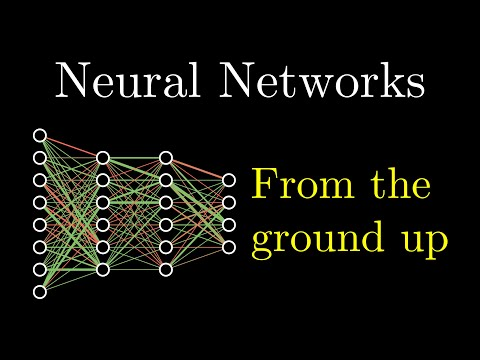

In [ ]:
YouTubeVideo("aircAruvnKk", width="560", height="315")

Further reading:
- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/), by Aurélien Géron
- [Everything you need to know about Neural Networks and Backpropagation — Machine Learning Easy and Fun](https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a), by Gavril Ognjanovski
- [Neural Network from scratch in Python](https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65), by Omar Aflak

## 1.1 Neurons

### Biological Neuron

The nervous system is composed of more than 100 billion cells known as [neurons](https://en.wikipedia.org/wiki/Neuron), which process and transmit the information received from our senses. Neurons are arranged together in our brain to form a network of nerves. These nerves pass electrical impulses from one neuron to the other.

<img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*vBIWWCFLLzZzGes1HcCJOw.jpeg' width="450">

Neurons are made up of three major parts:
- the *dendrites* collect information from other cells and send this information to the soma;
- the *soma* is the cell body containing the nucleus of the cell and keeping it alive;
- the *axon* transmits information away from the cell body towards other neurons or to the muscles and glands;
    - when the axon is stimulated by an electrical signal from the dendrites, the impulse is transmitted if the electrical signal is strong enough that it passes a certain level or threshold.
    - the axon terminal, located at the end of the axon farthest from the soma, contains [*synapses*](https://en.wikipedia.org/wiki/Synapse), which are structure that permits the transmission of information to another cell. Synapses have the ability to strengthen or weaken over time in responses to increases or decreases in their activity: this is called [*synaptic plasticity*](https://en.wikipedia.org/wiki/Synaptic_plasticity).

<center>
<img src='https://opentextbc.ca/introductiontopsychology/wp-content/uploads/sites/9/2013/11/6a3f0732c22683476ea201ffc5e428ad.jpg' width="400"></center>

Source: Jennifer Walinga, [The Neuron Is the Building Block of the Nervous System](https://opentextbc.ca/introductiontopsychology/chapter/3-1-the-neuron-is-the-building-block-of-the-nervous-system/), Chapter 4.1 of *Introduction to Psychology*

### Artificial neuron and perceptron

An [artificial neuron](https://en.wikipedia.org/wiki/Artificial_neuron) is inspired by its biological counterpart. It receives some inputs, transforms them, and transmits the output.  

An artificial neuron typically: 1) performs a weighted sum of the inputs; 2) passes this sum through an [activation function](https://en.wikipedia.org/wiki/Activation_function). We'll discuss what is an activation function below. For now, let's formalize what is happening in an artificial neuron. Let:
- $\boldsymbol{x}=(x_1, ..., x_d)$ be some input signals
    - the input signals can come from artificial neurons from the input layer (input data) or from artificial neurons from the hidden layers
- $y_k$ be the output signal of neuron $k$

The operation performed by an artificial neuron is:
$$y_k = \varphi(\boldsymbol{w} \cdot \boldsymbol{x} + b) = \varphi(w_{k1} x_{1} +  w_{k2} x_{2} + ... +  w_{kd} x_{d} + b_k) $$

Where:
- $\boldsymbol{w}=(w_{k1}, ..., w_{kd})$ are the **weights**
    -  the weights have the same role than the synapses. Their value determines the strength of the link between one artificial neuron and another. When we learn the weights, this link can strengthen or weaken, similarly than with synaptic plasticity
- $b_k$ is the **bias**
- $\varphi$ is an **activation function**
    - the activation function models what is happening in the axon of a biological neuron: the electrical impulses are only transmitted if they are strong enough to reach a given threshold

<center>
<img src='https://www.gabormelli.com/RKB/images/thumb/3/31/artificial-neuron-model.png/600px-artificial-neuron-model.png' width="450"></center>

Source: [Artificial Neuron](https://www.gabormelli.com/RKB/Artificial_Neuron), Gabor Melli's Research Knowledge Base

Note that, oftentimes, we write $b_k=w_{k0}$ and $x_{0}=1$, so that the expression simplifies to $y_k = \varphi(\boldsymbol{w} \cdot \boldsymbol{x})$.

The first artificial neuron was the [perceptron](https://en.wikipedia.org/wiki/Perceptron), invented in 1943 by Warren McCulloch and Walter Pitts. It was a binary classifier, i.e., the activation function was the unit step function:
- $\varphi(\boldsymbol{x}) = 1$ if $\boldsymbol{w} \cdot \boldsymbol{x} +b>0$
- $\varphi(\boldsymbol{x}) = 0$ otherwise

The perceptron, also called the single-layer perceptron, was the first and simplest (feedforward) neural network!

#### Activation function

As mentioned above, the [activation function](https://en.wikipedia.org/wiki/Activation_function) represents what is happening in the axon of a biological neuron: the electrical impulses are only transmitted if they are strong enough to reach a given threshold. There are many possible activation functions:
- unit step function ([Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function)), as used in the perceptron;
- sigmoid, e.g., the [logistic function](https://en.wikipedia.org/wiki/Logistic_function), previously seen for logistic regression
    - $\varphi(x)=\frac{1}{1 + e^{-x}}$
- Rectified linear unit ([ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))), one of the most popular because of its good performance and fast gradient computation
    - $\varphi(x) = \max(0,x) $
- Parametric rectified linear unit ([PReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#Parametric_ReLU)), a variant of ReLU that avoids the *dead* neurons problem, i.e., neurons becoming inactive
    - $\varphi(x) = \max(\alpha x,x) $ with $0<\alpha<1$
    - when $\alpha=0.01$, the function is called Leaky ReLU

<center>
<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ypsvQH7kvtI2BhzR2eT_Sw.png' width="400"> </center>

Source: Danqing Liu, [A Practical Guide to ReLU](https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7)

There are numerous other activation functions. Explore them [here](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions)!

You can also play and visualize more esay how neural networs are build with this [Web app](http://playground.tensorflow.org/)

## 1.2 Examples of Neural Nets


### Multilayer Perceptron (MLP)

A [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) is a *fully-connected* feedforward neural network. Here is an illustration, with 3 hidden layers:

<center>
<img src='https://miro.medium.com/v2/resize:fit:569/0*03elfV9p5nZTnRKe.png' width="500"> </center>

Each circle represents one perceptron. Historically, the perceptrons used a sigmoid activation function, but nowadays, ReLU and its variants are more frequently used.

Originally developed in the 1960s, these models had applications in diverse fields in the 1980s, such as speech recognition and machine translation software. Recently, interest in these networks was renewed due to the successes of deep learning.  

### Convolutional Neural Network (CNN)

A [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) is a class of neural network most commonly applied in processing data that has a grid-like topology, such as an image. They have proven very effective in analyzing visual imagery, e.g., image recognition and classification.

CNNs use a mathematical operation called [convolution](https://en.wikipedia.org/wiki/Convolution) in place of general matrix multiplication in at least one of their layers. This layer performs a dot product between two matrices, where one matrix is the set of learnable parameters otherwise known as a [kernel](https://en.wikipedia.org/wiki/Kernel_(image_processing)), and the other matrix is the restricted portion of the receptive field. In other words, a convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel:

<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif' width="300"> </center>

Source: Michael Plotke, [Kernel (image processing)](https://en.wikipedia.org/wiki/Kernel_(image_processing))

The kernel is a filter that applies a transformation to the original image, e.g., blurring, sharpening, embossing, edge detection, etc.

For a more detailed introduction of CNN, you can read:
- [An Intuitive Explanation of Convolutional Neural Networks](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/), by Ujjwal Karn
- [Convolutional Neural Networks, Explained](https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939), by Mayank Mishra

### Recurrent Neural Network (RNN)

A [Recurrent Neural Networks](https://en.wikipedia.org/wiki/Recurrent_neural_network) (RNN) is a class of artificial neural networks where connections between nodes can create a cycle, allowing output from some nodes to affect subsequent input to the same nodes. RNNs are useful when dealing with sequential data like natural language and time series. They are mostly used in the fields of natural language processing and speech recognition.

A RNN is very much alike feedforward neural nerworks, except it also has connections pointing backforward: at each time step $t$, a *recurrent neuron* receives the input $x_t$ as well as its own output from the previous step $y_{t-1}$:
$$y_{t} = \varphi(\boldsymbol{w_t} \cdot \boldsymbol{x_t} + \boldsymbol{w_y} \cdot \boldsymbol{y_{t-1}} + b)$$

We can represent a recurrent neuron graphically:
<center>
<img src='https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1401.png' width="400"> </center>


More generally, a recurrent unit may store more information than the previous predictions. A part of a neural network that preserves some state across time steps is called a *memory cell*. Indeed, since the output at time $t$ is a function of the inputs from previous time steps, the recurrent neuron has a form of memory! The memory cell is a hidden layer that flows through time:

<center>
<img src='https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1403.png' width="400"> </center>


RNNs have the obvious advantage of taking into account historical information. However, computation can be slow and it might be difficult to access information from a long time ago (issue of *fading memory*). To solve this issue, various memory cell architectures with long-term memory have been developed to save information, including:  
- The [Long Short-Term Memory](https://en.wikipedia.org/wiki/Long_short-term_memory) (LSTM) with the idea to store a short-term state $h_t$ and a long-term state $c_t$. LTSM rely on *gates*: when the gate is open, the output is multiplied by 1 (information preserved); when the gate is closed, the outputs is multiplied by 0 (information erased). Gates are a way to update and reset persistent information:
    - the *forget gate* controls which parts of the long-term state should be erased,
    - the *input gate* controls which parts of the output should be added to the long-term state,
    - the *output gate* controls which parts should be output at this time step
- The [Gated Recurrent Unit](https://en.wikipedia.org/wiki/Gated_recurrent_unit) (GRU), a simplified version of the LTSM.

<center>
<img src='https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1413.png' width="400"> </center>

For a more detailed introduction of RNN, you can read:
- [Source behind all the figures in this section]: [Chapter 4. Recurrent Neural Networks](https://www.oreilly.com/library/view/neural-networks-and/9781492037354/ch04.html), *Neural networks and deep learning*, by Aurélien Géron
- [Recurrent Neural Networks cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks), by Afshine Amidi

# 2. Implmentation

There exists several libraries to implement Neural Nets in Python, the most popular being PyTorch and TensorFlow/Keras:
- [PyTorch](https://pytorch.org/) is a deep learning framework based on [Torch](https://en.wikipedia.org/wiki/Torch_(machine_learning)). It was developed by Meta AI (Facebook) and open-sourced in 2017.
- [TensorFlow](https://www.tensorflow.org/) is an end-to-end open-source platform for machine learning. It was developed by Google and released as open source in 2015. Its name comes from the basic data structure used, namely [tensors](https://en.wikipedia.org/wiki/Tensor).
- [Keras](https://keras.io/) is a high-level neural networks library that is running on the top of TensorFlow, among others.

For a comparison of TensorFlow, Keras, and Pytorch, you can refer to:
- [PyTorch vs TensorFlow for Your Python Deep Learning Project](https://realpython.com/pytorch-vs-tensorflow/), by Ray Johns
- [Keras vs Tensorflow vs Pytorch: Key Differences Among Deep Learning](https://www.simplilearn.com/keras-vs-tensorflow-vs-pytorch-article), by John Terra

In this notebook, we are going to implement a Neural Net with PyTorch, displaying the simplicity, ease of use, and flexibility of this library. For a walkthrough on Neural Nets with TensorFlow/Keras, you can for instance refer to [Deep Learning with Python](https://github.com/fchollet/deep-learning-with-python-notebooks), by François Chollet (Chapter 7).

## 2.1 Application: Predicting house prices

In this application, we will implement a Linear Regression model with PyTorch to predict house prices using the [Ames Housing dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

### Data

In [ ]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/05-neural-networks/data/house_price.csv")
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
raw_data.shape

(1460, 81)

The dataset contains 81 columns. A description of the features is available in the file "[house_price_data_description](https://github.com/michalis0/DataScience_and_MachineLearning/blob/master/Week_5/data/house_price_data_description.txt)"

##### Preprocessing

Let's first extract the features of interest. We will use the numeric columns:

In [ ]:
# Data types
raw_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
# Display numeric features (integer and floats)
numeric_columns = list(raw_data.columns[(raw_data.dtypes==np.int64) |
                 (raw_data.dtypes==np.float64)])
print(numeric_columns, "\n", len(numeric_columns))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 
 38


`SalePrice` is the value we want to predict. We set it as the last column:

In [ ]:
# Output SalePrice as last column
numeric_columns.remove('SalePrice')
numeric_columns.append('SalePrice')

We also remove the `Id` column:

In [ ]:
# Remove Id
numeric_columns.remove('Id')

Now we extract the numeric data.

In [ ]:
# Extract numeric data
numeric_data = raw_data[numeric_columns]
numeric_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Now let's deal with the missing values in the data.

In [ ]:
# Display features with missing values
nan_columns = np.any(pd.isna(numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)
nan_columns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

We simply replace them with zero.

In [ ]:
# Replace NAN with 0
numeric_data = numeric_data.fillna(0)

##### Creating training and test set

Let's split the data for training and test. We use the `train_test_split` module of `sklearn`:

In [ ]:
# Splitting training/test set
numeric_data_train, numeric_data_test = train_test_split(numeric_data, test_size=0.1, random_state=7)

##### Normalizing the data

Before training our linear regression model, we have to normalize the data. We do this by subtracting each column from its minimum value and then dividing it by the difference between maximum and minimum. We use the `MinMaxScaler` of `sklearn`.

In [ ]:
#Define the scaler
scaler = MinMaxScaler()
#Fit the scaler
scaler.fit(numeric_data_train)
#Transform the train and the test set
numeric_data_train.loc[:,:] = scaler.transform(numeric_data_train)
numeric_data_test.loc[:,:] = scaler.transform(numeric_data_test)

Finally, we split the column we want to predict ("SalePrice") to our features:

In [ ]:
# Extract features and output
numeric_x_columns = list(numeric_data_train.columns)
numeric_x_columns.remove("SalePrice")
X_train_df = numeric_data_train[numeric_x_columns]
y_train_df = pd.DataFrame(numeric_data_train["SalePrice"])
X_test_df = numeric_data_test[numeric_x_columns]
y_test_df = pd.DataFrame(numeric_data_test["SalePrice"])


Ok, all set, we can start building our Neural Net!

### Building a Linear Regression model with PyTorch

We use the `PyTorch` library ([Documentation](https://pytorch.org/), imported at the beginning of this notebook with the following lines of codes:

```python
import torch
import torch.nn as nn
```

`torch.nn` contains the building blocks to build Neural Nets, e.g., the layers ([Documentation](https://pytorch.org/docs/stable/nn.html)).

#### Create tensors

The first step is to convert the data into torch tensors. A `torch.Tensor` is a multi-dimensional matrix containing elements of a single data type. It's very similar to arrays in `NumPy`.

We rely on `torch.tensor()` for the conversion ([Documentation](https://pytorch.org/docs/stable/tensors.html)).

In [ ]:
X_train = torch.tensor(X_train_df.values, dtype=torch.float)
y_train = torch.tensor(y_train_df.values, dtype=torch.float)
X_test = torch.tensor(X_test_df.values, dtype=torch.float)
y_test = torch.tensor(y_test_df.values, dtype=torch.float)

In [ ]:
print(X_train.size(), y_train.size())

torch.Size([1314, 36]) torch.Size([1314, 1])


#### Define and train a model with PyTorch

A model is defined as a `class` in PyTorch. Classes are a means of bundling data and functionality together, allowing to create a new type of Python object. You can read the Python documentation on [Classes](https://docs.python.org/3/tutorial/classes.html) to learn more about them.

When you create your Neural Net, you should define:
- a `__init__` function in which you define the layers of your network.
- a `forward` function (method) that defines the forward pass on the network.

For the beginning, let's start with a single layer network:
- The layer `nn.Linear()` performs a linear transformation ([Documentation](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)). The input and output are the number of neurons
- `nn.ReLU()` applies the Rectified Linear Unit function: $ReLU(x)=\max(0,x)$ ([Documentation](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)).

In [ ]:
class Net(nn.Module):
    def __init__(self, D_in, H1, D_out):
        super(Net, self).__init__()

        self.linear1 = nn.Linear(D_in, H1)        # Linear transformation for hidden layer
        self.linear2 = nn.Linear(H1, D_out)       # Linear transformation for output layer
        self.activation = nn.ReLU()               # Activation function for hidden layer

    def forward(self, x):
        y_pred = self.activation(self.linear1(x))   # Hidden layer: linear transformation + ReLU
        y_pred = self.linear2(y_pred)               # Output layer: linear transformation
        return y_pred

`D_in` is the input dimension, i.e., the number of features. Similarly, `D_out` is the output dimension, i.e., 1 (we only predict the "SalePrice"):

In [ ]:
D_in, D_out = X_train.shape[1], y_train.shape[1]

print(D_in, D_out)

36 1


Ok, let's define our first model. It is an instance of our newly-created class "Net". We are going to use 500 neurons for the hidden layer:

In [ ]:
# Model with 500 neurons
model1 = Net(D_in, 500, D_out)

Let's calculate now how many parameters we have in the model.

In [ ]:
# calculate how many parameters are in the model
pytorch_total_params = sum(p.numel() for p in model1.parameters() if p.requires_grad)
print(pytorch_total_params)

19001


The next steps is to define the **loss criterion** and the **optimizer** for the network. That is, we have to define the loss function we want to optimize during training and also the optimization method. We use:
- `MSELoss()` as loss criterion, i.e., the mean square error ([Documentation](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html))
- `SGD()`as optimizer, i.e., stochastic gradient descent ([Documentation](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html))

In [ ]:
# MSE loss
criterion = nn.MSELoss(reduction='sum')
# SGD optimizer for finding the weights of the network
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-4)

Wonderful, we are ready to do the training! We can simply by looping over the number of iterations. The training has 3 main steps:
- A forward pass to compute the prediction for the current data point (batch).
- Computing the loss for the current prediction with the previously defined criterion.
- A backward pass to compute the gradient of the loss with respect to the weight of the network (`backward()`)
- Finally, updating the weights of the network (`optimizer.step()`).

Note that in each backward pass PyTorch saves the gradient for all of the parameters. Therefore it is important to replace the old gradient values with zero in the beginning of each iteration (`optimizer.zero_grad()`), otherwise the gradients will be accumulated during the iterations!

In [ ]:
losses1 = []
losses1_test = []

for t in range(500):                # 500 iterations

    # Forward pass: compute prediction on training set
    y_pred = model1(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)
    if t%100 == 0:
      print(t, loss.item())
    losses1.append(loss.item())
    if torch.isnan(loss):
        break

    # Compute gradient
    optimizer.zero_grad()
    loss.backward()

    # Update
    optimizer.step()

    # Compute loss on test set
    losses1_test.append(criterion(model1(X_test), y_test).item())

Let's visualize the evolution of the MSE on the training set and test set:

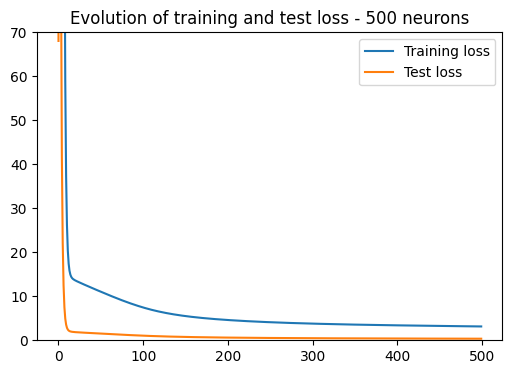

In [ ]:
# Plot training and test loss
plt.figure(figsize=(6, 4))
plt.plot(losses1, label="Training loss")
plt.plot(losses1_test, label="Test loss")
plt.title('Evolution of training and test loss - 500 neurons')
plt.ylim(top=70, bottom=0.0)
plt.legend()
plt.show()

Now let's try a new model with more neurons in the hidden layer. We use 1000 neurons, and follow the same steps as before:

In [ ]:
model2 = Net(D_in, 1000, D_out)

In [ ]:
# MSE loss
criterion = nn.MSELoss(reduction='sum')
# SGD optimizer for finding the weights of the network
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-4)

In [ ]:
losses2 = []

for t in range(500):
    y_pred = model2(X_train)

    loss = criterion(y_pred, y_train)
    losses2.append(loss.item())

    if torch.isnan(loss):
        break

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Let's visualize the evolution of the training loss for the two models:

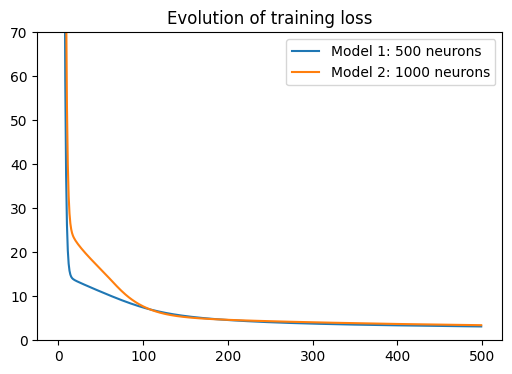

In [ ]:
# Plot training and test loss
plt.figure(figsize=(6, 4))
plt.plot(losses1, label="Model 1: 500 neurons")
plt.plot(losses2, label="Model 2: 1000 neurons")
plt.title('Evolution of training loss')
plt.ylim(top=70, bottom=0.0)
plt.legend()
plt.show()

Let's compare the MSE loss on the test data:

In [ ]:
# prediction for model 1
model1_pred = model1(X_test)
print("MSE loss for model 1: ", criterion(model1_pred, y_test))
# prediction for model 2
model2_pred = model2(X_test)
print("MSE loss for model 2: ", criterion(model2_pred, y_test))

MSE loss for model 1:  tensor(0.3581, grad_fn=<MseLossBackward0>)
MSE loss for model 2:  tensor(0.2589, grad_fn=<MseLossBackward0>)


Then, we can switch the model to evaluation mode with `.eval()`, then predict both the training and test data. After making predictions, calculate and print the training and test accuracy to evaluate the model's performance.

In [ ]:
# Set the model to evaluation mode
model1.eval()

# Predict and calculate training accuracy
y_tr_pred = model1(X_train)
y_tr_pred = torch.argmax(y_tr_pred, dim=1)
# train_labels = y_train.argmax(dim=1)
train_acc = (y_train == y_tr_pred).sum() / len(y_train)
print(f"train accuracy: {train_acc}")

# Predict and calculate test accuracy
y_te_pred = model1(X_test)
y_te_pred = torch.argmax(y_te_pred, dim=1)
# test_labels = y_test.argmax(dim=1)
test_acc = (y_test == y_te_pred).sum() / len(y_test)
print(f"test accuracy: {test_acc}")

train accuracy: 1.0
test accuracy: 0.0


What do you think?

## Your turn !

Based on this dataset ([link](https://github.com/michalis0/DataScience_and_MachineLearning/blob/master/05-neural-networks/data/spotify.csv)) imported from kaggle, create a Neural Network that will predict the streams of a song based on its bpm, key, danceability, valence, energy, acousticness, instrumentalness, liveness, and speechiness. (Hint: if there are some errors, try to copy/paste them in Google to see some solutions.)

In [ ]:
#import the dataset
df_lab = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/05-neural-networks/data/spotify.csv", encoding='latin-1', index_col="Unnamed: 0")
display(df_lab)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,LALA,Myke Towers,1.0,2023.0,3.0,23.0,1474.0,48.0,133716286.0,48.0,...,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
1,vampire,Olivia Rodrigo,1.0,2023.0,6.0,30.0,1397.0,113.0,140003974.0,94.0,...,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
2,Cruel Summer,Taylor Swift,1.0,2019.0,8.0,23.0,7858.0,100.0,800840817.0,116.0,...,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
3,WHERE SHE GOES,Bad Bunny,1.0,2023.0,5.0,18.0,3133.0,50.0,303236322.0,84.0,...,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
4,Columbia,Quevedo,1.0,2023.0,7.0,7.0,714.0,43.0,58149378.0,25.0,...,100.0,F,Major,67.0,26.0,71.0,37.0,0.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,BackOutsideBoyz,Drake,1.0,2022.0,11.0,4.0,1045.0,0.0,93367537.0,8.0,...,142.0,F,Minor,85.0,40.0,43.0,4.0,0.0,39.0,32.0
436,The Great War,Taylor Swift,1.0,2022.0,10.0,21.0,1274.0,0.0,181382590.0,1.0,...,96.0,F,Major,57.0,55.0,74.0,22.0,0.0,8.0,4.0
437,My Mind & Me,Selena Gomez,1.0,2022.0,11.0,3.0,953.0,0.0,91473363.0,61.0,...,144.0,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0
438,Bigger Than The Whole Sky,Taylor Swift,1.0,2022.0,10.0,21.0,1180.0,0.0,121871870.0,4.0,...,166.0,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0


In [ ]:
#select only the columns that are interesting for you and display the type of the data
df_lab = df_lab[['track_name', 'artist(s)_name', 'streams', 'bpm', 'key', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
display(df_lab.dtypes)

track_name             object
artist(s)_name         object
streams               float64
bpm                   float64
key                    object
danceability_%        float64
valence_%             float64
energy_%              float64
acousticness_%        float64
instrumentalness_%    float64
liveness_%            float64
speechiness_%         float64
dtype: object

In [ ]:
# keep only the numeric data
df_lab_num = df_lab[['streams', 'bpm', 'key', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
display(df_lab_num)

,streams,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,133716286.0,92.0,C#,71.0,61.0,74.0,7.0,0.0,10.0,4.0
1,140003974.0,138.0,F,51.0,32.0,53.0,17.0,0.0,31.0,6.0
2,800840817.0,170.0,A,55.0,58.0,72.0,11.0,0.0,11.0,15.0
3,303236322.0,144.0,A,65.0,23.0,80.0,14.0,63.0,11.0,6.0
4,58149378.0,100.0,F,67.0,26.0,71.0,37.0,0.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...
435,93367537.0,142.0,F,85.0,40.0,43.0,4.0,0.0,39.0,32.0
436,181382590.0,96.0,F,57.0,55.0,74.0,22.0,0.0,8.0,4.0
437,91473363.0,144.0,A,60.0,24.0,39.0,57.0,0.0,8.0,3.0
438,121871870.0,166.0,F#,42.0,7.0,24.0,83.0,1.0,12.0,6.0


In [ ]:
# Splitting training/test set
num_train, num_test = train_test_split(df_lab_num, test_size=0.1, random_state=1)

In [ ]:
# encode 'key' feature using LabelEncoder
le = LabelEncoder()
num_train['key'] = le.fit_transform(num_train['key'])
num_test['key'] = le.transform(num_test['key'])

In [ ]:
# scale your data using MinMaxScaler
#Define the scaler
scaler = MinMaxScaler()
#Fit the scaler
scaler.fit(num_train)
#Transform the train and the test set
num_train.loc[:,:] = scaler.transform(num_train)
num_test.loc[:,:] = scaler.transform(num_test)

In [ ]:
# Extract features and output
numeric_x_columns = list(num_train.columns)
numeric_x_columns.remove("streams")
X_train_df_lab = num_train[numeric_x_columns]
y_train_df_lab = pd.DataFrame(num_train["streams"])
X_test_df_lab = num_test[numeric_x_columns]
y_test_df_lab = pd.DataFrame(num_test["streams"])
display(X_train_df_lab)
display(y_train_df_lab)

,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
165,0.390071,0.5,0.816901,0.548387,0.373494,0.154639,0.033333,0.0750,0.162791
172,0.858156,0.6,0.239437,0.053763,0.566265,0.020619,0.000000,0.1125,0.046512
277,0.843972,0.8,0.633803,0.935484,0.590361,0.113402,0.000000,0.0750,0.651163
287,0.170213,0.3,0.577465,0.602151,0.554217,0.113402,0.000000,0.0875,0.860465
375,0.673759,1.0,0.788732,0.752688,0.554217,0.082474,0.000000,0.1375,0.534884
...,...,...,...,...,...,...,...,...,...
255,0.765957,0.0,0.225352,0.161290,0.180723,0.886598,0.000000,0.3875,0.023256
72,0.460993,0.8,0.549296,0.483871,0.710843,0.051546,0.000000,0.0750,0.000000
396,0.390071,1.0,0.802817,0.731183,0.614458,0.041237,0.000000,0.1375,0.023256
235,0.205674,0.4,0.464789,0.344086,0.530120,0.051546,0.000000,0.1500,0.000000


,streams
165,0.129677
172,0.377040
277,0.213535
287,0.015817
375,0.190737
...,...
255,0.338151
72,0.147587
396,0.109283
235,0.257261


In [ ]:
# Transform the data into tensor
X_train_lab = torch.tensor(X_train_df_lab.values, dtype=torch.float)
y_train_lab = torch.tensor(y_train_df_lab.values, dtype=torch.float)
X_test_lab = torch.tensor(X_test_df_lab.values, dtype=torch.float)
y_test_lab = torch.tensor(y_test_df_lab.values, dtype=torch.float)

Now create a Neural Net class with two hidden layer using the ReLU activation layer for both of them:

In [ ]:
class Net_lab(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net_lab, self).__init__()

        self.linear1 = nn.Linear(D_in, H1)        # Linear transformation for first hidden layer
        self.linear2 = nn.Linear(H1, H2)          # Linear transformation for second hidden layer
        self.linear3 = nn.Linear(H2, D_out)       # Linear transformation for output layer
        self.activation = nn.ReLU()               # Activation function for hidden layer

    def forward(self, x):
        y_pred = self.activation(self.linear1(x))        # Hidden layer: linear transformation + ReLU
        y_pred = self.activation(self.linear2(y_pred))   # Hidden layer: linear transformation + ReLU
        y_pred = self.linear3(y_pred)                    # Output layer: linear transformation
        return y_pred

In [ ]:
# give the right dimension to the input and output layers
D_in_lab, D_out_lab = X_train_lab.shape[1], y_train_lab.shape[1]

In [ ]:
# Create a model with 100 neurons for both hidden layers
model_lab = Net_lab(D_in_lab, 100, 100, D_out_lab)

In [ ]:
# calculate how many parameters the model has
params = sum(p.numel() for p in model_lab.parameters() if p.requires_grad)
display(params)

11201

In [ ]:
# use the MSELoss() as the loss criterion and Adam() as the optimizer (search online the optimizer)
# MSE loss
criterion = nn.MSELoss(reduction='sum')
# Adam optimizer for finding the weights of the network
optimizer = torch.optim.Adam(model_lab.parameters(), lr=1e-4)

Now create a loop to train your model (with 500 iterations), don't forget to save your loss criterion in order to plot it later !

In [ ]:
losses_lab = []
losses_test_lab = []

for t in range(500):                # 500 iterations

    # Forward pass: compute prediction on training set
    y_pred_lab = model_lab(X_train_lab)

    # Compute loss
    loss = criterion(y_pred_lab, y_train_lab)
    if t%100 == 0:
      print(t, loss.item())
    losses_lab.append(loss.item())
    if torch.isnan(loss):
        break

    # Compute gradient
    optimizer.zero_grad()
    loss.backward()

    # Update
    optimizer.step()

    # Compute loss on test set
    losses_test_lab.append(criterion(model_lab(X_test_lab), y_test_lab).item())

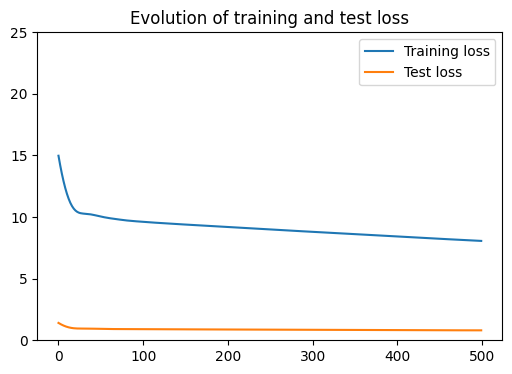

In [ ]:
# Plot training and test loss
plt.figure(figsize=(6, 4))
plt.plot(losses_lab, label="Training loss")
plt.plot(losses_test_lab, label="Test loss")
plt.title('Evolution of training and test loss')
plt.ylim(top=25, bottom=0.0)
plt.legend()
plt.show()

## 3. Automating Hyperparameter Tuning

When training a model, there are often many hyperparameters to adjust, leading to countless possible combinations. To determine the optimal configuration, experimentation is crucial. However, manually testing each combination can be highly time-consuming. In this section, we’ll automate the hyperparameter tuning process to efficiently find the best-performing model.

Since we are working on a regression problem with a numerical target, accuracy is not an appropriate metric for evaluation. Instead, we will use **RMSE** (Root Mean Squared Error) to assess model performance and identify the best hyperparameter combination.

We begin by redefining the `Net()` class, similar to how we did earlier.

In [ ]:
class Net(nn.Module):
    def __init__(self, D_in, H1, D_out):
        super(Net, self).__init__()

        self.linear1 = nn.Linear(D_in, H1)        # Linear transformation for hidden layer
        self.linear2 = nn.Linear(H1, D_out)       # Linear transformation for output layer
        self.activation = nn.ReLU()               # Activation function for hidden layer

    def forward(self, x):
        y_pred = self.activation(self.linear1(x))   # Hidden layer: linear transformation + ReLU
        y_pred = self.linear2(y_pred)               # Output layer: linear transformation
        return y_pred

In [ ]:
D_in, D_out = X_train.shape[1], y_train.shape[1]

Then we define the ranges for the hyperparameters you want to explore:

- **Neurons**: Test with hidden layers containing **50**, **150**, **200**, and **1000** neurons.
- **Loss Functions**: Experiment with **MSELoss** and **L1Loss** to assess model performance.

Additionally, initialize variables to track the best `RMSE` and the corresponding hyperparameters. Fix the learning rate at **0.0001** and the number of epochs at **500** for consistency across all tests.

In [ ]:
# Define the ranges for neurons and criterion you want to test
neurons_list = [50, 150, 200, 1000]  # Number of neurons to test in the hidden layer
criteria_list = [nn.MSELoss(reduction='sum'), nn.L1Loss()]  # List of criteria to test

# Initialize a variable to store the best metrics and hyperparameters
best_rmse = float('inf')  # We're aiming for the lowest RMSE
best_params = {}

# Fixed hyperparameters
learning_rate = 1e-4
epochs = 500


This code performs hyperparameter tuning by testing various combinations of the number of neurons in the hidden layer (`neurons_list`) and loss functions (`criteria_list`). For each combination, it initializes a model, trains it over a specified number of epochs, and evaluates the model’s performance on the test set using regression metrics such as MSE, MAE, and R². After calculating the RMSE (Root Mean Squared Error), the code tracks the best-performing model and its corresponding hyperparameters based on the lowest RMSE.

**Note**: This approach can be extended to tune other hyperparameters (such as learning rate, optimizer, etc.), and you can also use other evaluation metrics depending on the type of problem you're solving.

In [ ]:
# Loop over different neurons and criteria
for neurons in neurons_list:
    for criterion in criteria_list:
        print(f"\nTesting with {neurons} neurons and criterion: {criterion}")

        # Initialize the model and optimizer for each combination
        model1 = Net(D_in, neurons, D_out)
        optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate)

        losses_train = []
        losses_test = []

        for t in range(epochs):
            model1.train()  # Set model to training mode

            # Forward pass: compute prediction on training set
            y_pred = model1(X_train)

            # Compute loss
            loss = criterion(y_pred, y_train)
            losses_train.append(loss.item())
            if t % 100 == 0:
                # Print the training loss every 100 steps
                print(f"Epoch {t}, Loss: {loss.item()}")

            # Compute gradient
            optimizer.zero_grad()
            loss.backward()

            # Update model parameters
            optimizer.step()

            # Compute loss on test set
            model1.eval()  # Set model to evaluation mode
            with torch.no_grad():
                y_pred_test = model1(X_test)
                loss_test = criterion(y_pred_test, y_test).item()
                losses_test.append(loss_test)

        # Calculate regression metrics on the test set
        with torch.no_grad():
            y_pred_test = model1(X_test).numpy()
            y_test_np = y_test.numpy()

            # Calculate MSE, MAE, and R²
            mse = mean_squared_error(y_test_np, y_pred_test)
            mae = mean_absolute_error(y_test_np, y_pred_test)
            r2 = r2_score(y_test_np, y_pred_test)

            # Print the metrics
            print(f"Test MSE: {mse}")
            print(f"Test MAE: {mae}")
            print(f"Test R²: {r2}")
            print(f"Test RMSE: {mse ** 0.5}")

            # Keep track of the best model based on RMSE (sqrt of MSE)
            rmse = mse ** 0.5
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = {'neurons': neurons, 'criterion': criterion}
                print(f"New best RMSE: {best_rmse} with {neurons} neurons and criterion: {criterion}")

# Print the best hyperparameters and corresponding RMSE after testing all combinations
print("\nBest Test RMSE:", best_rmse)
print("Best Hyperparameters:", best_params)



Testing with 50 neurons and criterion: MSELoss()
Epoch 0, Loss: 15.465291976928711
Epoch 100, Loss: 5.4925856590271
Epoch 200, Loss: 4.253623962402344
Epoch 300, Loss: 3.8040671348571777
Epoch 400, Loss: 3.549574613571167
Test MSE: 0.0023058978840708733
Test MAE: 0.03410031646490097
Test R²: 0.8239542968767484
Test RMSE: 0.04801976555618398
New best RMSE: 0.04801976555618398 with 50 neurons and criterion: MSELoss()

Testing with 50 neurons and criterion: L1Loss()
Epoch 0, Loss: 0.32716256380081177
Epoch 100, Loss: 0.2918567955493927
Epoch 200, Loss: 0.2568773329257965
Epoch 300, Loss: 0.22217483818531036
Epoch 400, Loss: 0.18822026252746582
Test MSE: 0.043106772005558014
Test MAE: 0.1703827679157257
Test R²: -2.291022293787709
Test RMSE: 0.20762170408114372

Testing with 150 neurons and criterion: MSELoss()
Epoch 0, Loss: 142.4981689453125
Epoch 100, Loss: 4.69320821762085
Epoch 200, Loss: 3.8697476387023926
Epoch 300, Loss: 3.4886724948883057
Epoch 400, Loss: 3.2593283653259277
Test 